In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import collections
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import numpy as np
from wordcloud import WordCloud
sns.set()

In [2]:
df = pd.read_csv('SMSSpamCollection.txt', delimiter = '\t', names =['label', 'message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


To know the class with the most length words, I applied the len function to the message column

In [4]:
df['message_length'] = df['message'].apply(len)

In [5]:
df.head()

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
df.describe(include = 'all')

,label,message,message_length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.489950
std,NaN,NaN,59.942907
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,62.000000
75%,NaN,NaN,122.000000


1. Total number of messages are 5572


2. The unique messages are 5169 which means that some messages are repeated


3. The most frequent message is an ham which is "Sorry, I'll call later"


4. The message with the maximum length of words is 910 while the least is 2


In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

There are 4825 ham messages and 747 spam messages.

This is an unbalanced dataset.

#### Visualization of the dataset

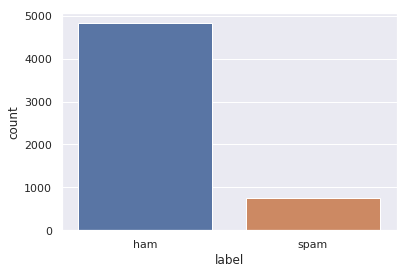

In [8]:
sns.countplot(x = 'label', data = df)

The most lengthy message and the least lengthy message

In [9]:
df[df['message_length'] == 910]['message'].values[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [10]:
df[df['message_length'] == 2]['message'].values[0]

'Ok'

In [11]:
spam_  = df[df['label'] == 'spam']
ham_  = df[df['label'] == 'ham']

In [12]:
spam_.head()

,label,message,message_length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


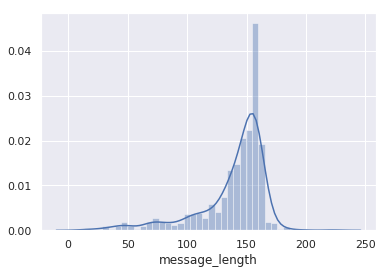

In [13]:
sns.distplot(spam_['message_length'])

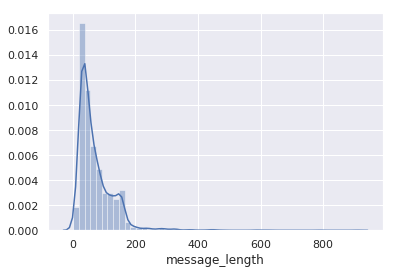

In [14]:
sns.distplot(ham_['message_length'])

The above is the visualization of the distribution of the length sizes.

1. Spam message really got lengthy messages than ham messages. we can see that distribution was increasing gradually until it got to 150 before it began to reduce. It is centered between 100 and 150



2. For ham messages, as the message length is increasing, the distribution is reducing. This is centered around 100. Most of the messages' length are less than 100


3. we see that there are ouliers as well

#### I want to know and visualize the most commonly used word in the spam messages so as to know the words that can contribute to the possibilities of spam

In [15]:
joined_spams = [''.join(spam_['message'].unique())]

#### preprocessing of the document
1. removal of stopwords
2. removal of non alphabetic characters

In [16]:
stop_word = stopwords.words('english')

In [17]:
def text_cleaning(text):
    text = ' '.join((''.join([' ' if i in string.punctuation else i for i in text])).split())
    tokens = [word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    tokens = [word.lower() for word in tokens]
    new_tokens = [i for i in tokens if i not in stopwords.words('english')]
    preprocessed_text = ' '.join([i for i in new_tokens])
    
    return preprocessed_text

In [18]:
cleaned_message = [text_cleaning(i) for i in spam_['message'].values]

In [19]:
cleaned_message[0]

'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18'

### Calculating the word importance of each words in the spam messages using TF-IDF approach 

#### visit this link for more information on TF-IDF..........

In [20]:
vec = TfidfVectorizer(ngram_range=(1,2))

word_importance = vec.fit_transform(cleaned_message).todense()

using an ngram of range(1, 2), I converted the word_importance of the spam messages into an array with .todense() method

Note that the word importance are calculated per message leaving us with a new matrix of shape (747, 9022).

The rows sigifies the message, while the columns signify the importance  of the words or phrase in each messages(rows)

In [21]:
word_importance.shape

(747, 9022)

we'll sum the word importance of the columns to obtain the total word importance in the whole document(spam message). This will be used as the word frequency. This will help us to know the most relevant words to the spam messages. In other words, the words that contributes to the spam characteristics of the messages.

In [22]:
sum_words = word_importance.sum(axis = 0)

In [23]:
words_freqency = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freqency = sorted(words_freqency, key = lambda x: x[1], reverse=True)

The result is a list of tuples

In [24]:
words_freqency[:10]

[('call', 21.072349059008253),
 ('free', 16.50097322622742),
 ('txt', 11.834515327375932),
 ('ur', 11.59014397436423),
 ('mobile', 11.457300397649485),
 ('text', 10.67122452090582),
 ('claim', 10.611473888114432),
 ('stop', 10.333191348645727),
 ('prize', 10.127392676354464),
 ('reply', 9.642504983796996)]

To obtain the words and their values for ploting, we'll convert them to a dictionary

##### NB: This is for the top 70 words

In [25]:
top_70_most_common_words = words_freqency[:70]
top_70 = dict(top_70_most_common_words)

In [26]:
columns = top_70.keys()
values = top_70.values()
pos = np.arange(len(columns))
width = 1.0

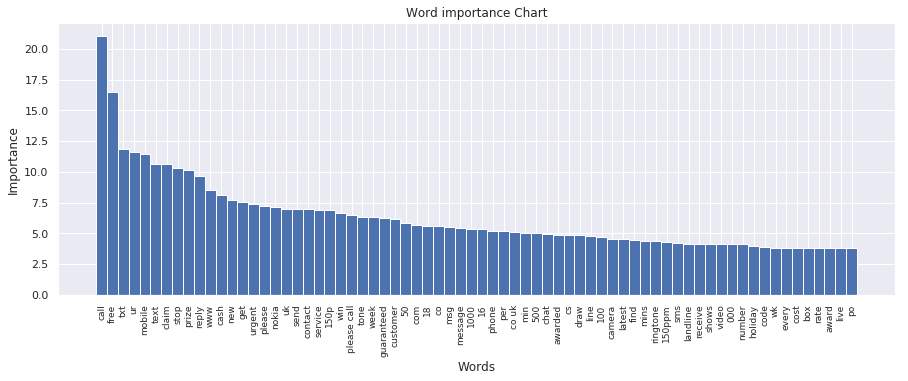

In [27]:
plt.figure(figsize=(15,5))
ax = plt.axes()
ax.set_xticks(pos)
ax.set_xticklabels(columns, rotation = 'vertical', fontsize = 9)
ax.set_title('Word importance Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Importance')
plt.bar(pos, values, width, color = 'b')
plt.show()

I used Bag of words method which gave me a similar result with the TF-IDF but TF-IDF.

But beyond number of occurence of a word, it enables me to know the importance of a word or phrase in the document. 

TF - IDF(Term Frequency Inverse Document Frequency) deals with bias while bag of words will give importance to less important words which will introduce bias. IDF deals with this issue.

You can read more about TF-IDF and Bag of Words here

# using bag of words

In [28]:
vec = CountVectorizer(ngram_range=(1,2))
bag_of_words = vec.fit_transform(cleaned_message).todense()

In [29]:
sum_words = bag_of_words.sum(axis = 0)

In [30]:
words_freqency = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freqency = sorted(words_freqency, key = lambda x: x[1], reverse=True)

In [31]:
top_70_most_common_words = words_freqency[:70]

top_70 = dict(top_70_most_common_words)

In [32]:
columns = top_70.keys()
values = top_70.values()
pos = np.arange(len(columns))
width = 1.0

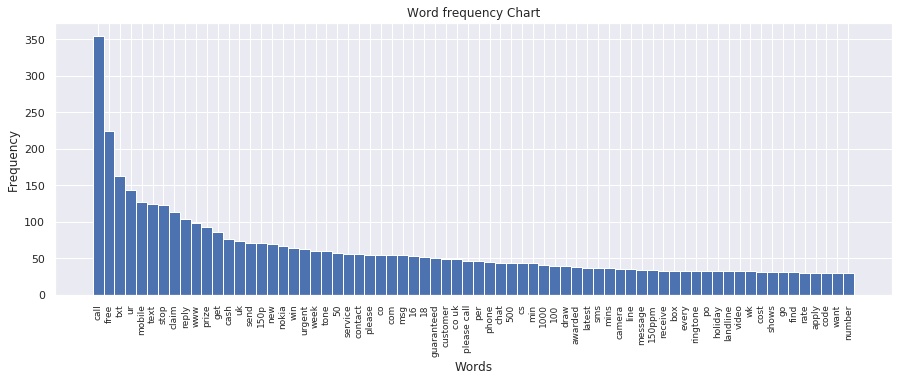

In [33]:
plt.figure(figsize=(15,5))
ax = plt.axes()
ax.set_xticks(pos)
ax.set_xticklabels(columns, rotation = 'vertical', fontsize = 9)
ax.set_title('Word frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(pos, values, width, color = 'b')
plt.show()

At first sight, they look similar right ?

But word frequency is'nt strong enough to denote the word importance. An example is stop words. These are highly and most frequently used words in a sentence but they add little or no value to the sentence.

BOG plots the word "stop" as an importance word before claim, but after introducing the IDF to the TF, we realise that the word "claim" is more relevant to the document than the word "stop". 

I choose to work with the TF-IDF and I used it during the model development

#### word cloud

In [34]:
wordcloud = WordCloud()

generator = wordcloud.generate(''.join(cleaned_message))

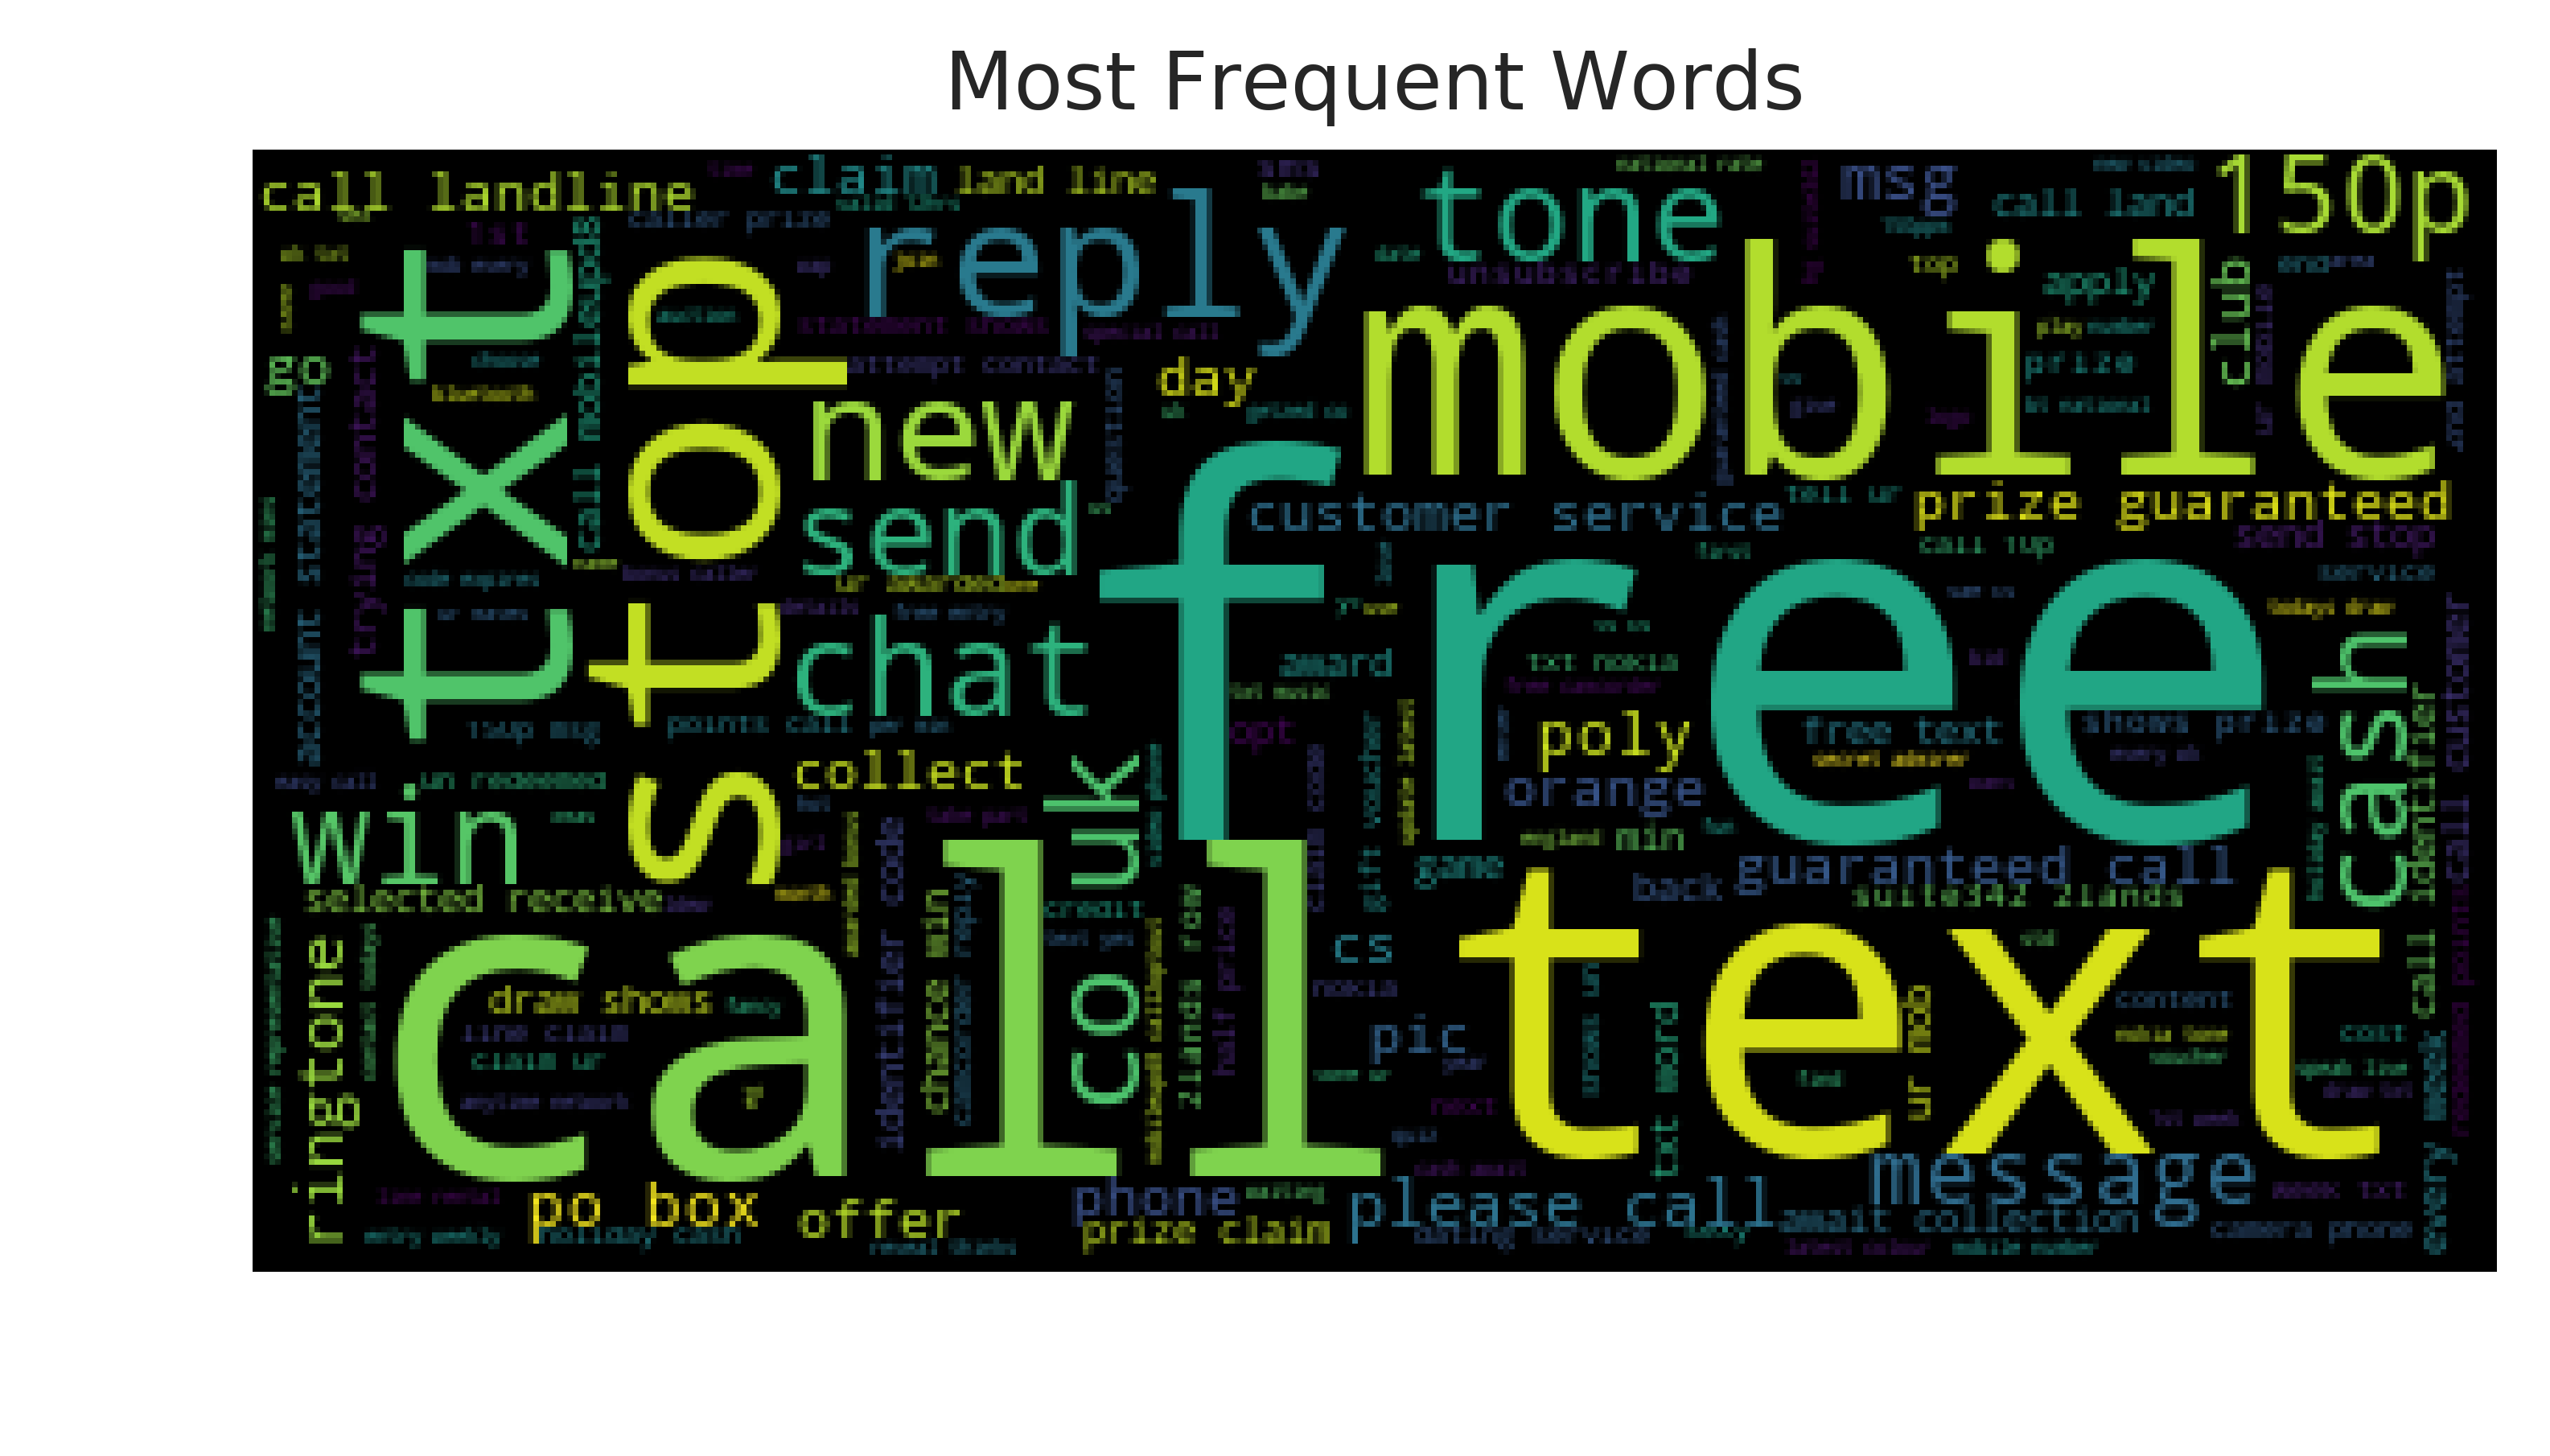

In [35]:
plt.figure(dpi = 600)
plt.imshow(generator.recolor(random_state = 2050))
plt.title('Most Frequent Words')
plt.axis('off')
plt.show()